# Project: Investigate Medical Appointment Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


#### A person makes a doctor appointment, receives all the instructions and no-show. Who to blame?
In this notebook we will try to analyze why would some patient not show up for his medical appointment and whether there are reasons for that using the data we have.<br>
We will try to find some correlation between the different attributes we have and whether the patient shows up or not.    
The dataset we are going to use contains 110.527 medical appointments and its 14 associated variables ( PatientId, AppointmentID, Gender, ScheduledDay, AppointmentDay, Age, Neighbourhood, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap', SMS_received, No-show )
#### Questions to answer
* what is the percentage of noshow?
* What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
 - Is the time gender related to whether a patient will show or not?
 - Are patients with scholarship more likely to miss their appointment?
 - Are patients who don't recieve sms more likely to miss their appointment?
 - Is the time difference between the scheduling and appointment related to whether a patient will show?
 - Does age affect whether a patient will show up or not?
 - what is the percentage of patients missing their appointments for every neighbourhood



In [187]:
#importing needed modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#choose plots style
sns.set_style('darkgrid')
#make sure plots are inline with the notebook
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### loading th dataset and checking the columns we have

In [188]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [189]:
#get the shape and types of our data
print(df.shape)
pd.DataFrame(df.dtypes)

(110527, 14)


,0
PatientId,float64
AppointmentID,int64
Gender,object
ScheduledDay,object
AppointmentDay,object
Age,int64
Neighbourhood,object
Scholarship,int64
Hipertension,int64
Diabetes,int64


In [190]:
#get some statistics about our data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [191]:
#check if there is any missing values in our data
df.info()
df.isna().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

In [192]:
#check if there is any duplicated rows in our data
df.duplicated().any()

False

<h3 style='color:blue'>Notes on data exploration</h3>

we can see from the info we got from our analysis that there is some columns that needs to have its type corrected like dates. Another great finding is that our data doesn't have any duplicated or missing values. Also the column noshow can be a bit confusing and we can invert the values to make it more intuitive (show instead of noshow) and we can also turn it to integer instead of yes or no.

### Data Cleaning 

* Drop irrelevent columns
* Modify column names
* Correct data types
* Invert noshow column in to show with integer values
* Create a new column for days difference between scheduling and appointment


In [193]:
#Drop irrelevent columns
df.drop(['PatientId','AppointmentID'],axis=1,inplace=True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [194]:
#change all cloumns name to lower case and replace all - with _
df.columns=df.columns.str.lower().str.replace('-','_')
pd.DataFrame(df.columns)

,0
0,gender
1,scheduledday
2,appointmentday
3,age
4,neighbourhood
5,scholarship
6,hipertension
7,diabetes
8,alcoholism
9,handcap


In [195]:
#change data columns to data type
df['scheduledday']=pd.to_datetime(df['scheduledday'])
df['appointmentday']=pd.to_datetime(df['appointmentday'])


In [196]:
#Turn no_show column to show
print(df.no_show.unique())
df.no_show=df.no_show.map({'No':1,'Yes':0})
df.rename(columns={'no_show':'show'},inplace=True)
print(df.show.unique())
df.head()

['No' 'Yes']
[1 0]


,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1


In [197]:
#Create a new column for days difference between scheduling and appointment
day_diff=(df.appointmentday.dt.date-df.scheduledday.dt.date).dt.days 
df.insert(3,'day_diff',day_diff)
df.day_diff.dtype

dtype('int64')

In [198]:
#check data one last time
df.dtypes

gender                    object
scheduledday      datetime64[ns]
appointmentday    datetime64[ns]
day_diff                   int64
age                        int64
neighbourhood             object
scholarship                int64
hipertension               int64
diabetes                   int64
alcoholism                 int64
handcap                    int64
sms_received               int64
show                       int64
dtype: object

<h3 style='color:blue'>Notes on data Cleaning</h3>
Now that we have our data cleaned and with the proper type for every column and also created new Time difference column we can start analyzing our data and try to find the correlation between differnt variables and the show column


<a id='eda'></a>
## Exploratory Data Analysis




In [199]:
#define function to get the ratio of show in different categories
def plot_rat(x):
    df.groupby(x).show.mean().plot(kind='bar').set_ylabel('Ratio of show');
#     plt.legend()

### what is the percentage of noshow?

In [200]:
#get some statistics about our data
df.describe()

,day_diff,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,10.183702,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.798067
std,15.254996,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,-6.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,4.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,15.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,179.000000,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


percentage of patients who didn't show up for their appointment is 20.193255946510803 %


,show
show,
0,22319
1,88208


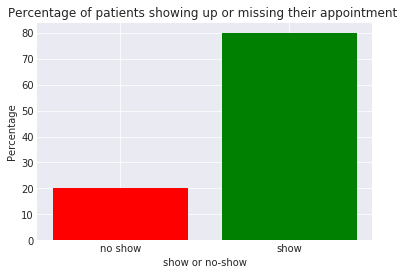

In [201]:
# percentage of show and no show
print(f"percentage of patients who didn't show up for their appointment is { (1-df.show.mean())*100 } %" )
no_show=len(df[df.show==0])/len(df.show)
show=len(df[df.show==1])/len(df.show)
plt.bar(['show','no show'],[show*100,no_show*100],color=['g','r']);
plt.title('Percentage of patients showing up or missing their appointment ');
plt.ylabel('Percentage');
plt.xlabel('show or no-show');
df.groupby('show')[['show']].count()

### What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?


In [202]:
#create filters for show and noshow
show=(df.show == 1)
noshow=(df.show == 0)
total_miss=len(df[noshow])
total=len(df)

###  Is the time gender related to whether a patient will show or not?

percentage of Females and Males who missed their appointment:


,gender
F,13.204013
M,6.989242


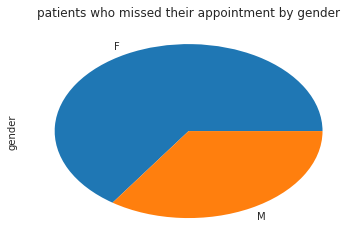

In [203]:
#get the number of patients missing their appointments by gender
noshow_gender=df[noshow]['gender'].value_counts()
noshow_gender.plot(kind='pie');
plt.title('patients who missed their appointment by gender');
print('percentage of Females and Males who missed their appointment:')
#get the percentage of patients missing their appointments by gender
pd.DataFrame(noshow_gender*100/total)

<h4 style='color:blue'>Finding</h4>

#### The percentage of females missing their appointment is nearly two time the males.So females are more likely to miss their appointment.



###  Are patients with scholarship more likely to miss their appointment?

,show
scholarship,
0,0.801928
1,0.762637


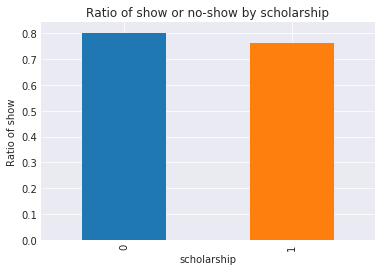

In [204]:
#what is the percentage of patients missing their appointment by scholarship
plot_rat(df.scholarship)
plt.title('Ratio of show or no-show by scholarship')
df.groupby('scholarship')[['show']].mean()


<h4 style='color:blue'>Finding</h4>

#### It seems that patients with scholarship are actually more likely to miss their appointment


###  Are patients with hipertension more likely to miss their appointment?

,show
hipertension,
0,0.790963
1,0.826980


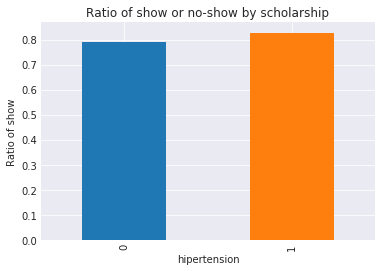

In [205]:
#what is the percentage of patients missing their appointment by hipertension
plot_rat(df.hipertension)
plt.title('Ratio of show or no-show by scholarship')
df.groupby('hipertension')[['show']].mean()


<h4 style='color:blue'>Finding</h4>

#### It seems that patients with hipertension are actually more likely to show up for their appointment


###  Are patients who don't recieve sms more likely to miss their appointment?

,show
sms_received,
0,0.832967
1,0.724255


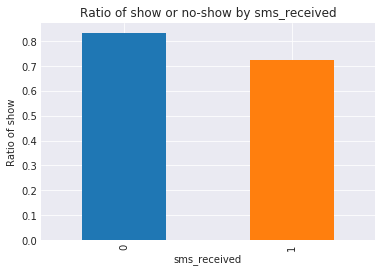

In [206]:
#what is the percentage of patient who attended their appointment by sms_received
plot_rat(df.sms_received)
plt.title('Ratio of show or no-show by sms_received')
df.groupby('sms_received')[['show']].mean()


<h4 style='color:blue'>Finding</h4>

#### A strange finding here suggests that patients who received a sms are more likely to miss their appointment !!



### Is the time difference between the scheduling and appointment related to whether a patient will show?

the propotion of different time difference for patients who missed their appiontments:


,day_diff2
more_than_15,38.460505
more_than_4,32.922622
fewdays,20.565438
sameday,8.029034


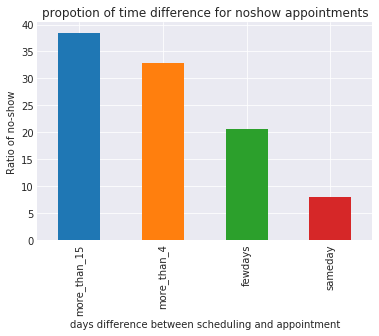

In [207]:
#filter for positive day difference
df1=df[df.day_diff>=0]
# df1.day_diff.unique()
#turn day diff into categorical column Day_diff2
bin_edges=[-1,0,4,15,179]
names=['sameday','fewdays','more_than_4','more_than_15']
df['day_diff2']=pd.cut(df1.day_diff,bin_edges,labels=names)
#filter for noshow records and count values for each category of day_diff2

noshow_day_diff=df[noshow].day_diff2.value_counts()/len(df[noshow])*100
noshow_day_diff.plot(kind='bar');
plt.title('propotion of time difference for noshow appointments');
plt.xlabel('days difference between scheduling and appointment');
plt.ylabel('Ratio of no-show');
print('the propotion of different time difference for patients who missed their appiontments:')
pd.DataFrame(noshow_day_diff)

<h4 style='color:blue'>Finding</h4>
It appears that the longer the period between the scheduling and appointment the more likely the patient won't show up.

### does age affect whether a patient will show up or not?

,age
count,22319.000000
mean,34.317667
std,21.965941
min,0.000000
25%,16.000000
50%,33.000000
75%,51.000000
max,115.000000


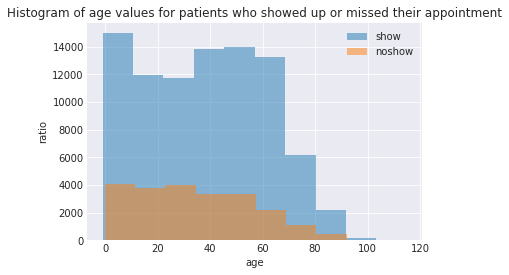

In [208]:
#plot the histograns of age for patients who showed up and who didn't
df[show].age.hist(alpha=0.5,label='show')
df[noshow].age.hist(alpha=0.5,label='noshow')
plt.legend()
plt.xlabel('age')
plt.ylabel('ratio')
plt.title('Histogram of age values for patients who showed up or missed their appointment')
#ger the mean age for patients who showed up and who didn't
df[noshow][['age']].describe()

<h4 style='color:blue'>Finding</h4>

#### there is no clear relation between the age and whether the patiens shows up or not but yonger patients are slightly more likely to miss their appointments.

### what is the percentage of patients missing their appointments for every neighbourhood

In [209]:
#get the number of records for each neighbourhood
rec_neigh=df['neighbourhood'].value_counts()
#get the number of records for patients missing their appointments for each neighbourhood
rec_neigh_noshow=df[noshow].neighbourhood.value_counts()
#percentage of patients missing their appointments for every neighbourhood
rec_neigh_noshow_percentage=rec_neigh_noshow/rec_neigh
pd.DataFrame(rec_neigh_noshow_percentage.sort_values(axis=0, ascending=False))



,neighbourhood
ILHAS OCEÂNICAS DE TRINDADE,1.000000
SANTOS DUMONT,0.289185
SANTA CECÍLIA,0.274554
SANTA CLARA,0.264822
ITARARÉ,0.262664
JESUS DE NAZARETH,0.243954
HORTO,0.240000
ILHA DO PRÍNCIPE,0.234775
CARATOÍRA,0.230409
ANDORINHAS,0.230327


<a id='conclusions'></a>
## Conclusions

#### After analyzing the dataset here are some findings:
1- percentage of patients who didn't show up for their appointment is 20.19% .    
2- The percentage of females missing their appointment is nearly two time the males.So females are more likely to miss their appointment.    
3- It appears that the longer the period between the scheduling and appointment the more likely the patient won't show up.     
4- It seems that patients with scholarship are actually more likely to miss their appointment.     
5- A strange finding here suggests that patients who received a sms are more likely to miss their appointment !!    
6- There is no clear relation between the age and whether the patients shows up or not but younger patients are slightly more likely to miss their appointments.    

#### Analysis Shortcoming & Data Limitations
* The data doesn't state the exact hour of the appointment which would have been very useful to try to find out which hours has the most missing appointments and which doesn't. It could also be very useful to know the difference between scheduling and the appointment since many of the scheduling are on the same day.
* The data doesn't state if any day is vacation or not which can indicate if people tend to miss their appointments more on working days.
* The age column had a negative value but according to the data creator, it means a baby not porn yet (a pregnant woman).
* when calculating day difference between the scheduling and appointment days we had some negative value which make no sense and might mean that the records of questions have wrong data.
